In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d
import seaborn as sns 
from sklearn.metrics import confusion_matrix 

In [3]:
DF = pd.read_csv("cleaned_departures_development_traffic1_reg.csv")
DF = DF.drop(columns=["Name", "Development_Level", "Area"])
DF = DF[~DF["Traffic"].isin(["Moderate"])]
print(DF)

     Departures  Domestic  International  FlagCarrier_Flights Traffic
0          7422         0           7422                 1925       0
1         11822      8395           3427                11496       1
2          4978      2907           2071                 5891       0
3          3742         8           3734                 2249       0
4          6535         0           6535                 4085       0
..          ...       ...            ...                  ...     ...
217         807         0            807                 1132       0
218         463         8            455                  560       0
219       96704     76147          20557               102696       1
220       10390      6394           3996                 6648       0
221        7577      2896           4681                 3866       0

[221 rows x 5 columns]


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Importing train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

DF = DF.dropna()

# Separate features (X) and target variable (y)
X = DF[["Departures", "Domestic", "International", "FlagCarrier_Flights"]]  # Features
y = DF["Traffic"]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

In [7]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.5227272727272727

Confusion Matrix:
 [[ 0 21]
 [ 0 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.52      1.00      0.69        23

    accuracy                           0.52        44
   macro avg       0.26      0.50      0.34        44
weighted avg       0.27      0.52      0.36        44



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


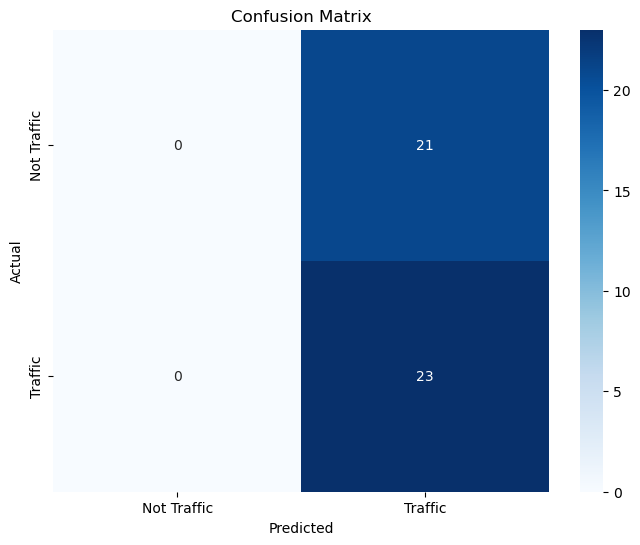

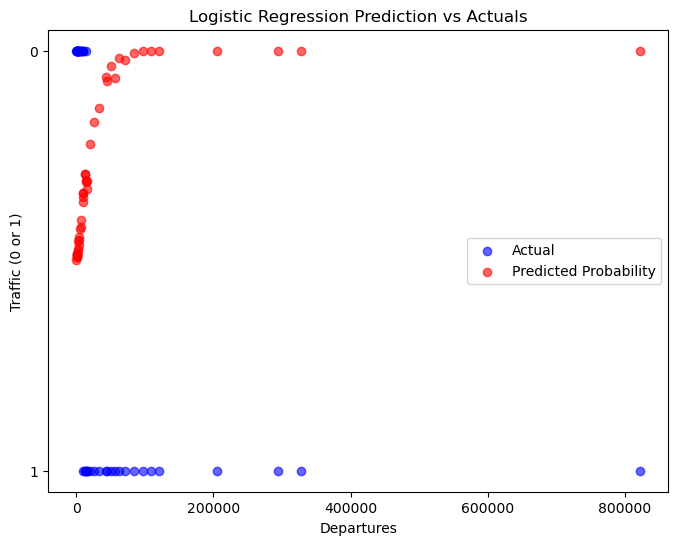

In [8]:
# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Traffic", "Traffic"], yticklabels=["Not Traffic", "Traffic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualizing a Linear Regression-like plot (for example, Departures vs Traffic)
# Since it's a classification problem, we will visualize this for one feature only.
plt.figure(figsize=(8, 6))

# Scatter plot for Departures vs Traffic
plt.scatter(X_test["Departures"], y_test, color="blue", label="Actual", alpha=0.6)

# Logistic Regression probabilities (using the linear decision boundary)
probabilities = log_reg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
plt.scatter(X_test["Departures"], probabilities, color="red", label="Predicted Probability", alpha=0.6)

plt.title("Logistic Regression Prediction vs Actuals")
plt.xlabel("Departures")
plt.ylabel("Traffic (0 or 1)")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


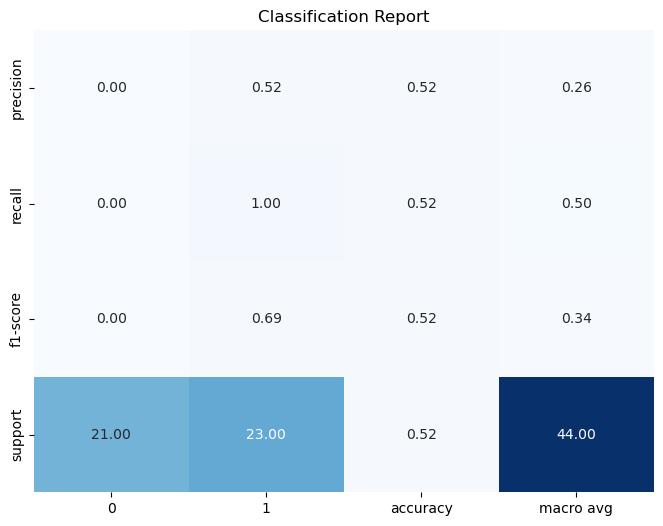

Model Accuracy: 52.27%


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# 2. **Classification Report Visualization** (as a table)
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

# Plot the classification report as a table
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap="Blues", cbar=False)
plt.title("Classification Report")
plt.show()

# Optional: Display the accuracy score
print(f"Model Accuracy: {accuracy * 100:.2f}%")
